In [3]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv("4-wheeler-EV-carwale.csv")#reading the dataset

In [5]:
data.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


In [6]:
data = data.rename(columns={'Fuel Economy': 'Fuel_Economy'})
data = data.rename(columns={'Value for Money': 'vof'})
data.head()

,review,Exterior,Comfort,Performance,Fuel_Economy,vof,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


In [7]:
model_num_list = []
for val in data['model_name'].unique():
    model_num_list.append(val)
model_num_list

['hyundai kona', 'tata nexon ev', 'tata tigor ev']

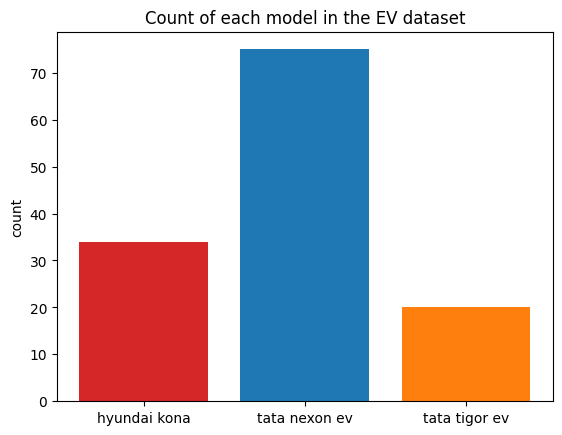

In [8]:
# Count the occurrences of items in the list within the dataset
counts = [data[data['model_name'] == item]['model_name'].count() for item in model_num_list]

# Create a bar chart
fig, ax = plt.subplots()
plt.bar(model_num_list, counts)
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(model_num_list, counts, label=bar_labels, color=bar_colors)
# Add labels and a title
ax.set_ylabel('count')
ax.set_title('Count of each model in the EV dataset')

# Show the plot
plt.show()

In [9]:
#Each car models mean values
x=[]
for i in model_num_list:
    Exterior= []	
    Fuel_Economy = []
    Value_for_Money = []
    rating = []
    comfort = []
    performance = []
    for index, row in data.iterrows():
        if(row['model_name'] == i):
            Exterior.append(row['Exterior'])
            Fuel_Economy.append(row['Fuel_Economy'])
            Value_for_Money.append(row['vof'])
            rating.append(row['rating'])
            comfort.append(row['Comfort'])
            performance.append(row['Performance'])
    x.append(statistics.mean(Exterior))
    x.append(statistics.mean(comfort))
    x.append(statistics.mean(performance))
    x.append(statistics.mean(Fuel_Economy))
    x.append(statistics.mean(Value_for_Money))
    x.append((statistics.mean(rating)))
print(x)

[4.5, 4.323529411764706, 4.529411764705882, 4.5588235294117645, 4.088235294117647, 4.4411764705882355, 4.533333333333333, 4.52, 4.493333333333333, 4.453333333333333, 4.293333333333333, 4.453333333333333, 4.2, 4.2, 3.95, 4.05, 3.8, 3.75]


In [10]:
mean_values = np.array(x)
mean_values = mean_values.reshape(3,6)
mean_values = mean_values.T
print(mean_values)
mean_values = np.split(mean_values,[3,6,9,12,15])

[[4.5        4.53333333 4.2       ]
 [4.32352941 4.52       4.2       ]
 [4.52941176 4.49333333 3.95      ]
 [4.55882353 4.45333333 4.05      ]
 [4.08823529 4.29333333 3.8       ]
 [4.44117647 4.45333333 3.75      ]]


In [11]:
print(mean_values)

[array([[4.5       , 4.53333333, 4.2       ],
       [4.32352941, 4.52      , 4.2       ],
       [4.52941176, 4.49333333, 3.95      ]]), array([[4.55882353, 4.45333333, 4.05      ],
       [4.08823529, 4.29333333, 3.8       ],
       [4.44117647, 4.45333333, 3.75      ]]), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64), array([], shape=(0, 3), dtype=float64)]


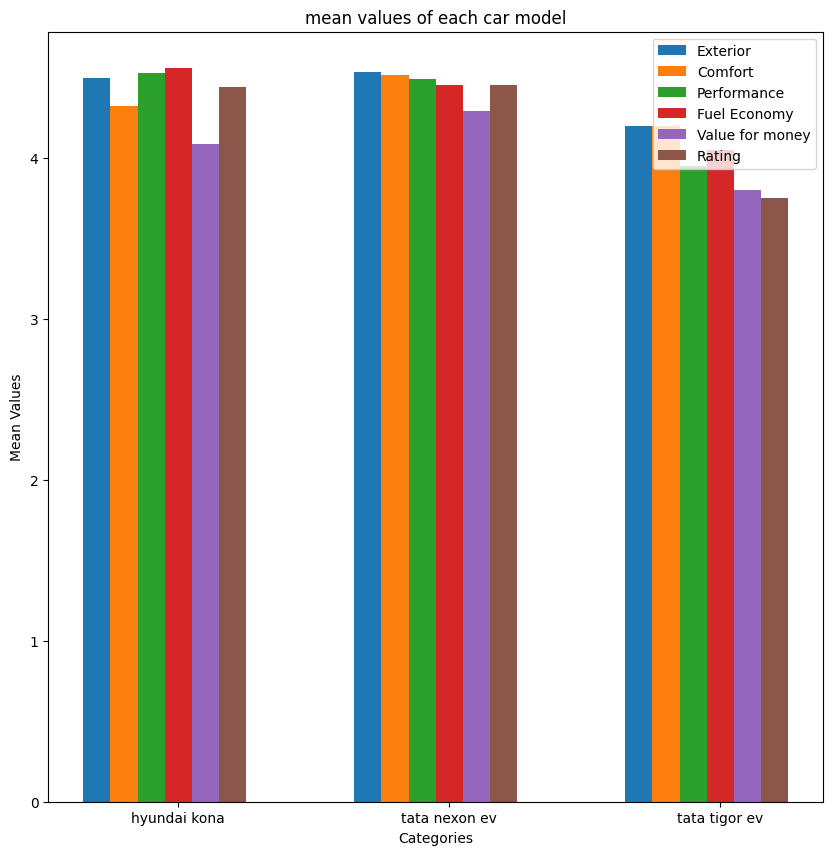

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for six variables
categories = model_num_list
variable1 = mean_values[0][0]
variable2 = mean_values[0][1]
variable3 = mean_values[0][2]
variable4 = mean_values[1][0]
variable5 = mean_values[1][1]
variable6 = mean_values[1][2]

# Define the width of each bar
bar_width = 0.1

# Create an array for the x-axis positions of each category
x = np.arange(len(categories))

# Create the grouped bar chart
plt.figure(figsize=(10, 10))

plt.bar(x - 3*bar_width, variable1, width=bar_width, label='Exterior', align='center')
plt.bar(x - 2*bar_width, variable2, width=bar_width, label='Comfort', align='center')
plt.bar(x - bar_width, variable3, width=bar_width, label='Performance', align='center')
plt.bar(x, variable4, width=bar_width, label='Fuel Economy', align='center')
plt.bar(x + bar_width, variable5, width=bar_width, label='Value for money', align='center')
plt.bar(x + 2*bar_width, variable6, width=bar_width, label='Rating', align='center')

# Add labels and a legend
plt.xlabel('Categories')
plt.ylabel('Mean Values')
plt.title('mean values of each car model')
plt.xticks(x, categories)
plt.legend()

# Show the plot
plt.show()

In [13]:
# saving columns Name and Team into df_new
df_new = data[['model_name']].copy()

#print (df_new)
selected_row = df_new

# Use nunique() to count unique values in the selected row
unique_values_count = selected_row.nunique()

print(f"Total unique values in the selected row: {unique_values_count}")

Total unique values in the selected row: model_name    3
dtype: int64


In [14]:
#analysis for the rating prediction
X = data.drop(["rating","review","Condition","driven","model_name"], axis=1)  # Features
y = data["rating"]  # Target variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
#can be used furthur with a ev car's Exterior,Comfort,Performance,Fuel Economy,Value for Money to find the rating using predict function

Mean Squared Error: 1.4831301642349226
R-squared: 0.44082766814121155


In [206]:
#attempt for random forest classification as rating has the possibility to fall under only 6 category with respect to performance
import pandas as pd


X = data.drop(["rating","review","Condition","driven","model_name"], axis=1)  # Features
y = data["rating"]  # Target variable

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print a classification report and confusion matrix for more details
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.71      1.00      0.83        15

    accuracy                           0.65        26
   macro avg       0.24      0.33      0.28        26
weighted avg       0.47      0.65      0.55        26

[[ 2  0  0  0  1]
 [ 1  0  0  0  0]
 [ 0  0  0  1  1]
 [ 1  0  0  0  4]
 [ 0  0  0  0 15]]


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [207]:
#random forest requires more data for increased accuracy

In [ ]:
#the dataset might have a bias as Count of each model in the 
#EV dataset is not evenly spread across the entire dataset.
#From the two models done above we can say that regression
# type models are far more accurate and efficient compared
# to classification models as for the outcomes and the input
# values are more linearly tied in nature.